In [1]:
import pandas as pd
import numpy as np
import torch
from model import ImprovedModel, LightningModel

In [2]:
data = pd.read_csv('kaggle/test.csv')
data = data / 255.0
data = np.reshape(data.to_numpy(), (data.shape[0], 1, 28,28))

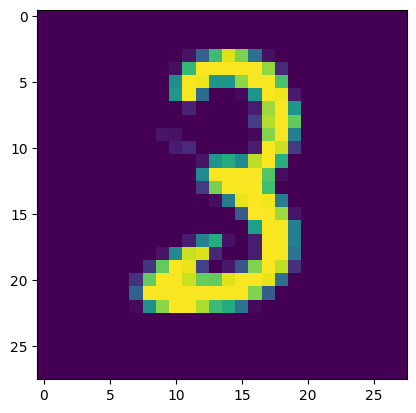

In [6]:
import matplotlib.pyplot as plt

plt.imshow(data[4][0])

In [7]:
data = torch.tensor(data, dtype=torch.float32)
data = data.cuda()
data.shape

torch.Size([28000, 1, 28, 28])

In [9]:
model = ImprovedModel(10)
lightning = LightningModel.load_from_checkpoint(checkpoint_path='model/best_model.ckpt', model=model)

In [10]:
lightning.eval()

with torch.inference_mode():
    logits = lightning(data)

preds = torch.argmax(logits, dim=1)

In [13]:
preds.cpu()[0:10]

tensor([2, 0, 9, 0, 3, 7, 0, 3, 0, 3])